---
### Polynomial Regression
---

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure(bar)  2205 non-null   float64
 1   vol(l/min)     2205 non-null   float64
 2   temp(degC)     2205 non-null   float64
 3   power(W)       2205 non-null   float64
 4   efficiency(%)  2205 non-null   float64
dtypes: float64(5)
memory usage: 103.4 KB
None 



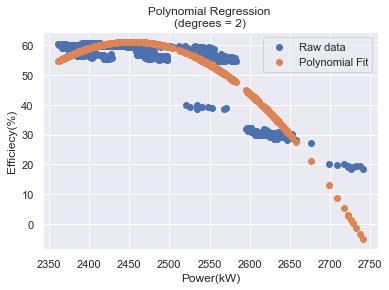

Model equation: y = -4730.1 + 3.9x + -0.001x^2
Mean square error: 19.44
Coefficient of determination(r2): 0.7577


In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
sns.set()

# Import & inspect the data
data = pd.read_csv(r'hydraulic.csv', index_col = 0)
print(data.info(), '\n')

# Select the features
x = data[['power(W)']]
y = data['efficiency(%)']

# Preprocess for polynomial 
poly_features = PolynomialFeatures(degree = 2)
x_poly = poly_features.fit_transform(x)

# Build model
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

# Plot
plt.scatter(x, y, label = 'Raw data')
plt.scatter(x, y_pred, label = 'Polynomial Fit')
plt.xlabel('Power(kW)')
plt.ylabel('Efficiecy(%)')
plt.title('Polynomial Regression \n(degrees = 2)')
plt.legend()
plt.show()

# Model outputs
theta_0 = model.intercept_
_, theta_1, theta_2 = model.coef_
print('Model equation: y = {} + {}x + {}x^2'.format(theta_0.round(1), theta_1.round(1), theta_2.round(3)))
print('Mean square error:', mean_squared_error(y, y_pred).round(2))
print('Coefficient of determination(r2):', r2_score(y, y_pred).round(4))